In [1]:
# Step 1: Install SQLite extension for Colab
%load_ext sql
%sql sqlite:///air_quality_health.db

In [2]:
%%sql

-- Create Cities Table
CREATE TABLE IF NOT EXISTS cities (
    city_id INTEGER PRIMARY KEY AUTOINCREMENT,
    city_name TEXT NOT NULL
);

-- Create Air Quality Table
CREATE TABLE IF NOT EXISTS air_quality (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    city_id INTEGER,
    date TEXT,
    co REAL,
    no2 REAL,
    pm10 REAL,
    temperature REAL,
    humidity REAL,
    FOREIGN KEY(city_id) REFERENCES cities(city_id)
);

-- Optional: Health Indicators Table
CREATE TABLE IF NOT EXISTS health_indicators (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    city_id INTEGER,
    year INTEGER,
    mortality_rate REAL,
    life_expectancy REAL,
    FOREIGN KEY(city_id) REFERENCES cities(city_id)
);


 * sqlite:///air_quality_health.db
Done.
Done.
Done.


[]

In [3]:
from google.colab import files
uploaded = files.upload()

Saving AirQuality 2.csv to AirQuality 2.csv


In [7]:
import pandas as pd

# Assuming file name is 'air_quality_data.csv'
air_df = pd.read_csv('AirQuality 2.csv')
air_df.head()

,,,,,Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2,6;1360;150;11,9;1046;166;1056;113;1692;1268;13,6;48,9;0,7578;;
10/03/2004;19.00.00;2;1292;112;9,4;955;103;1174;92;1559;972;13,3;47,7;0,7255;;,NaN
10/03/2004;20.00.00;2,2;1402;88;9,0;939;131;1140;114;1555;1074;11,9;54,0;0,7502;;
10/03/2004;21.00.00;2,2;1376;80;9,2;948;172;1092;122;1584;1203;11,0;60,0;0,7867;;
10/03/2004;22.00.00;1,6;1272;51;6,5;836;131;1205;116;1490;1110;11,2;59,6;0,7888;;


In [11]:
import pandas as pd

# Assuming file name is 'AirQuality 2.csv'
air_df = pd.read_csv('AirQuality 2.csv', delimiter=';')

# Print the actual column names to identify the correct 'City' column name
print(air_df.columns)

# Adding a new 'city_name' column with a single city name (replace 'YourCityName')
air_df['city_name'] = 'YourCityName'  # Replace 'YourCityName' with the actual city name

# Optional cleaning and renaming columns
air_df.rename(columns={
    'Date': 'date',
    'CO(GT)': 'co',
    'NO2(GT)': 'no2',
    'PM10': 'pm10',
    'T': 'temperature',
    'RH': 'humidity'
}, inplace=True)

# Extract unique cities
cities_df = air_df[['city_name']].drop_duplicates().reset_index(drop=True)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


In [13]:
import pandas as pd

# Assuming file name is 'AirQuality 2.csv'
air_df = pd.read_csv('AirQuality 2.csv', delimiter=';')

# Print the actual column names to identify the correct 'City' column name
print(air_df.columns)

# Adding a new 'city_name' column with a single city name (replace 'YourCityName')
air_df['city_name'] = 'YourCityName'  # Replace 'YourCityName' with the actual city name

# Optional cleaning and renaming columns
# **Check the original column name for PM10 in the printed columns**
# **and update the dictionary key accordingly if it's different**
air_df.rename(columns={
    'Date': 'date',
    'CO(GT)': 'co',
    'NO2(GT)': 'no2',
    'PM10 (GT)': 'pm10',  # Updated column name if it was 'PM10 (GT)'
    'T': 'temperature',
    'RH': 'humidity'
}, inplace=True)

# Extract unique cities
cities_df = air_df[['city_name']].drop_duplicates().reset_index(drop=True)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


In [18]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('air_quality_health.db')

# Insert cities
cities_df.to_sql('cities', conn, if_exists='append', index=False)

# Map city_name to city_id
city_map = pd.read_sql("SELECT * FROM cities", conn)
merged_df = air_df.merge(city_map, on='city_name', how='left')

# Print the columns of merged_df to check for the actual PM10 column name
print(merged_df.columns)

# Rename the 'Unnamed: 15' column to 'pm10' to match the database column name
merged_df.rename(columns={'Unnamed: 15': 'pm10'}, inplace=True)  # Rename here

# Reorder and select columns to match table
# Now use 'pm10' as it's the correct column name in merged_df
air_quality_data = merged_df[['city_id', 'date', 'co', 'no2', 'pm10', 'temperature', 'humidity']]

# Insert into air_quality table
air_quality_data.to_sql('air_quality', conn, if_exists='append', index=False)

Index(['date', 'Time', 'co', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'no2', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'temperature', 'humidity', 'AH', 'Unnamed: 15',
       'Unnamed: 16', 'city_name', 'city_id'],
      dtype='object')


56826

In [21]:
!pip install ipython-sql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.0 MB/s eta 0:00:00


In [29]:
!pip install prettytable

In [30]:
%load_ext sql
%sql sqlite:///air_quality_health.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [32]:
import prettytable

# Set the style using a string 'PLAIN'
%config SqlMagic.style = "PLAIN"

In [34]:
%config SqlMagic.displaycon = False  # Disable connection display
%config SqlMagic.feedback = False    # Disable query feedback
%config SqlMagic.autopandas = True   # Enable automatic conversion to pandas DataFrame

In [37]:
import prettytable
from prettytable import PrettyTable
%config SqlMagic.style = prettytable.DEFAULT

ERROR:root:The 'style' trait of a SqlMagic instance expected a unicode string, not the TableStyle <TableStyle.DEFAULT: 10>.


In [44]:
import prettytable

# Set the style using PrettyTable's constants directly
%config SqlMagic.style = prettytable.PLAIN_COLUMNS  # or another style like MSWORD_FRIENDLY, DEFAULT, MARKDOWN, ORGMODE

ERROR:root:The 'style' trait of a SqlMagic instance expected a unicode string, not the TableStyle <TableStyle.PLAIN_COLUMNS: 12>.


In [47]:
%%sql
%config SqlMagic.style = 'PLAIN_COLUMNS'  # Add this line before your SQL query

SELECT c.city_name, AVG(a.pm10) AS avg_pm10
FROM air_quality a
JOIN cities c ON a.city_id = c.city_id
GROUP BY c.city_name
ORDER BY avg_pm10 DESC
LIMIT 10;

(sqlite3.OperationalError) near "%": syntax error
[SQL: %config SqlMagic.style = 'PLAIN_COLUMNS'  # Add this line before your SQL query

SELECT c.city_name, AVG(a.pm10) AS avg_pm10
FROM air_quality a
JOIN cities c ON a.city_id = c.city_id
GROUP BY c.city_name
ORDER BY avg_pm10 DESC
LIMIT 10;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [49]:
%config SqlMagic.style = 'DEFAULT'

In [50]:
%%sql
SELECT SUBSTR(date, 1, 4) AS year, AVG(pm10) AS avg_pm10
FROM air_quality a
JOIN cities c ON a.city_id = c.city_id
WHERE c.city_name = 'Delhi'
GROUP BY year
ORDER BY year;

""


In [51]:
%%sql
SELECT ROUND(AVG(temperature), 2) AS avg_temp,
       ROUND(AVG(humidity), 2) AS avg_humidity,
       ROUND(AVG(pm10), 2) AS avg_pm10
FROM air_quality;

,avg_temp,avg_humidity,avg_pm10
0,9.35,39.05,None


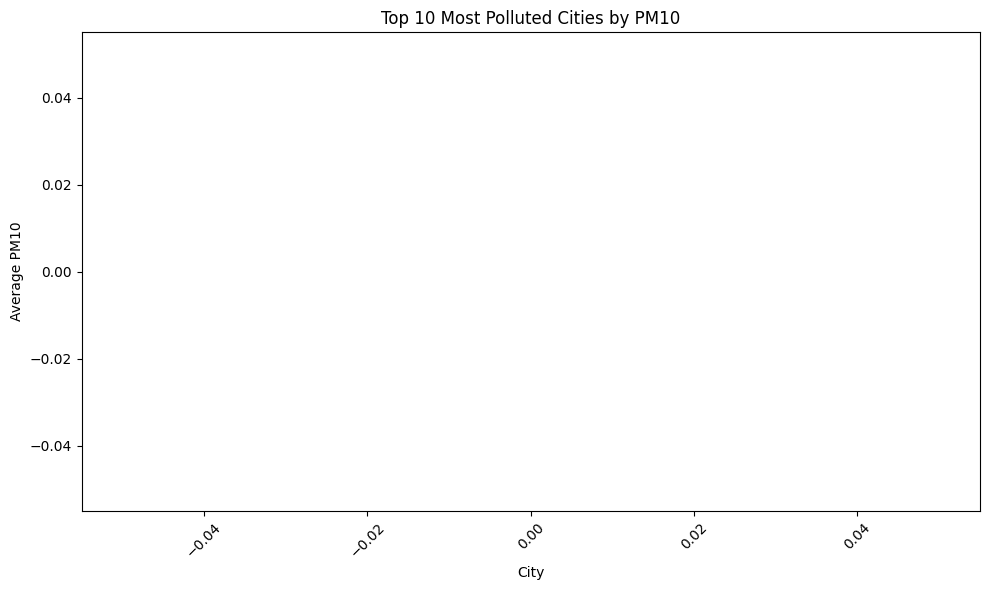

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Correct SQL query
query = """
SELECT c.city_name, AVG(a.pm10) AS avg_pm10
FROM air_quality a
JOIN cities c ON a.city_id = c.city_id
GROUP BY c.city_name
ORDER BY avg_pm10 DESC
LIMIT 10;
"""

# Read into DataFrame
top_cities_df = pd.read_sql(query, conn)

# Drop rows with NULL avg_pm10
top_cities_df.dropna(subset=['avg_pm10'], inplace=True)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_cities_df['city_name'], top_cities_df['avg_pm10'], color='tomato')
plt.xlabel('City')
plt.ylabel('Average PM10')
plt.title('Top 10 Most Polluted Cities by PM10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
